1.0*x**2 - 1.0

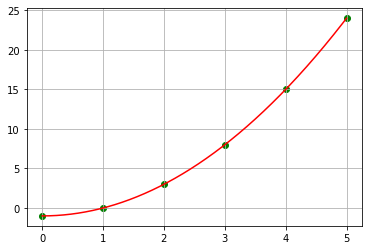

In [4]:
import numpy as np
import scipy.linalg as sla
import sympy as sym
import matplotlib.pyplot as plt
from random import randint

#entry points
x1 = [0, 1,2,3,4,5]
y1 = [-1,0,3,8,15,24]
#x1 = sorted(list(set(np.random.uniform(-10, 10, 100).tolist())))
#y1 = np.random.uniform(-30, 30, len(x1)).tolist()
#x1 = sorted(list(set(np.random.randint(-10, 10, 17).tolist())))
#y1 = np.random.randint(-30, 30, len(x1)).tolist()

#doing matrix Vandermond
van = []
b = 0
for i in range(1, len(x1)+1):
    for j in range(1, len(x1)+1):
        b = x1[i-1]**(j-1)
        van.append(b)
s = int(len(van)/len(x1))
vandermond = np.array(van)
vandermond=np.split(vandermond,s)    

#inverse marix
X_inv = np.linalg.inv(vandermond)

#searching coefficients a0...an
A = X_inv@y1
A_rounded = sym.Matrix(np.round(A,4))

#building a polynomial
degree = [i for i in range(0, len(x1))]
x = sym.Symbol('x')
polynom = 0
polynom1 = 0
for i in range(0, len(degree)):
    polynom +=A[i]*x**degree[i]
for i in range(0, len(degree)):
    polynom1 +=A_rounded[i]*x**degree[i]
display(polynom1)

#doing fuction for our polynom
x0 = x1[0]
x_max = x1[-1] 
y = sym.lambdify(x, polynom)
x = np.arange(x0, x_max, 0.0001)
r = [y(i) for i in x]

#plot the points and the polynom
fig = plt.figure()
ax = fig.gca()
ax.grid()
ax.scatter(x1, y1, c='g')
ax.plot(x, r, c='r')